Data shape: (1000, 1)
Data type: uint8
Min value: 2
Max value: 255


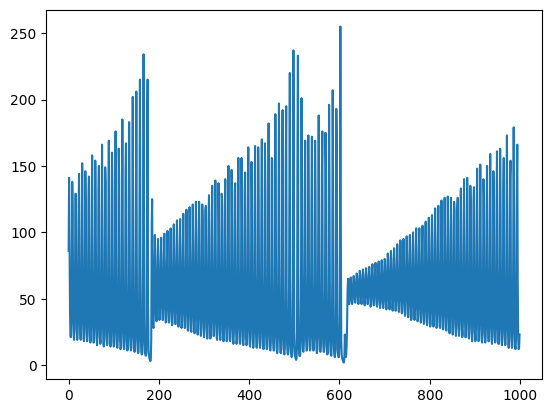

In [25]:
file = 'Xtrain.mat'
# load training data
import scipy.io
import numpy as np
import matplotlib.pyplot as plt

# Load the training data
data = scipy.io.loadmat(file)
X_train = data['Xtrain']

# Display basic information about the data
print(f"Data shape: {X_train.shape}")
print(f"Data type: {X_train.dtype}")
print(f"Min value: {np.min(X_train)}")
print(f"Max value: {np.max(X_train)}")

# plot the data
plt.plot(X_train)
plt.show()



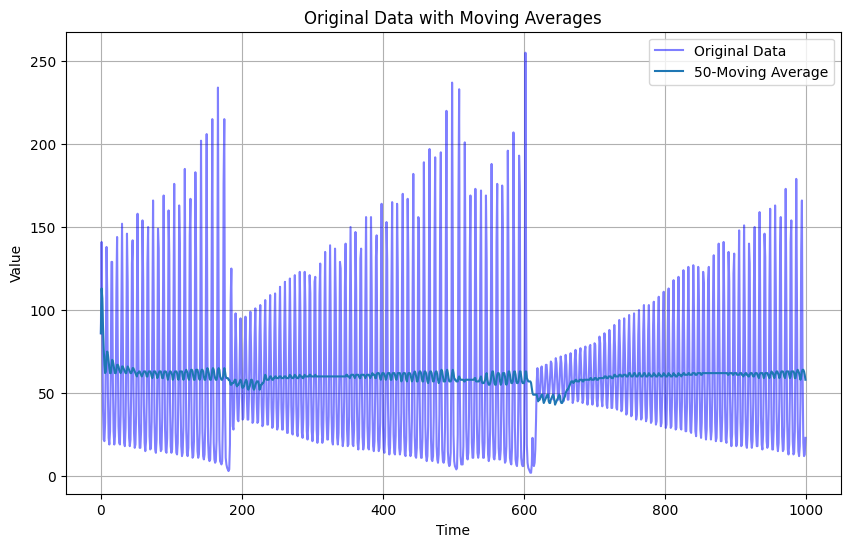

In [28]:
# Define a function to calculate k-moving average
def moving_average(data, k):
    """
    Calculate the k-moving average of the data.
    
    Args:
        data: Input time series data (numpy array)
        k: Window size for the moving average
    
    Returns:
        Numpy array with the k-moving average
    """
    # Create an output array with the same shape as the input
    ma = np.zeros_like(data)
    
    # Calculate the moving average
    for i in range(len(data)):
        # For the first k-1 points, use available data points
        if i < k:
            ma[i] = np.mean(data[:i+1])
        else:
            ma[i] = np.mean(data[i-k+1:i+1])
    
    return ma

# Calculate moving averages with different window sizes
k_values = [50]
plt.figure(figsize=(10, 6))

# Plot original data
plt.plot(X_train, 'b-', alpha=0.5, label='Original Data')

# Plot moving averages
for k in k_values:
    ma = moving_average(X_train, k)
    plt.plot(ma, label=f'{k}-Moving Average')

plt.legend()
plt.title('Original Data with Moving Averages')
plt.xlabel('Time')
plt.ylabel('Value')
plt.grid(True)
plt.show()
